In [31]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Comma Data Updated Headers.csv')

In [5]:
df.head()

,RespondentID,Sentence,OxfordCommaHeard,OxfordCommaCare,Unnamed: 4,DataPlural,DataPluralCare,GrammarImportance,Gender,Age,Income,Education,Location
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df = df.dropna(subset = ['Gender', 'Age'])
series = df.groupby(["Gender", "Age"]).transform(lambda x: x.fillna(x.value_counts().index[0]))

In [7]:
type(series)

pandas.core.frame.DataFrame

In [33]:
df2 = df.dropna()
df3 = pd.get_dummies(series, drop_first= True)

,RespondentID,Sentence,OxfordCommaHeard,OxfordCommaCare,Unnamed: 4,DataPlural,DataPluralCare,GrammarImportance,Income,Education,Location
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,"$50,000 - $99,999",Bachelor degree,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,"$0 - $24,999",Less than high school degree,Middle Atlantic
5,3292926586,"It's important for a person to be honest, kind...",No,A lot,"Some experts say it's important to drink milk,...",Yes,Some,Very important,"$25,000 - $49,999",Some college or Associate degree,New England


In [28]:
#rename column names
df3 = df3.rename(index = str, columns ={"Sentence_It's important for a person to be honest, kind, and loyal.": "Oxford Comma Use", 
                                        "OxfordCommaHeard_Yes":"Heard of Oxford Comma",
                                        "OxfordCommaCare_Not at all" : "Oxford Care - Not at all", 
                                        "OxfordCommaCare_Not much" : "Oxford Care - Not much",
                                        "OxfordCommaCare_Some" : "Oxford Care - Some",
                                        "Unnamed: 4_Some experts say it's important to drink milk, but the data is inconclusive." : "Data Use",
                                        "DataPlural_Yes": "Data is Plural",
                                        "DataPluralCare_Not at all": "Data Plural Care - Not at all",
                                        "DataPluralCare_Not much" : "Data Plural Care - Not much",
                                        "DataPluralCare_Some" : "Data Plural Care - Some",
                                        "GrammarImportance_Somewhat important": "Grammar - Somewhat Important",
                                        "GrammarImportance_Somewhat unimportant": "Grammar - Somewhat Unimportant",
                                        "GrammarImportance_Very important": "Grammar - Very Important",
                                        "GrammarImportance_Very unimportant": "Grammar - Very Unimportant",
                                        "Education_Graduate degree": "Graduate Degree",
                                        "Education_High school degree" : "High School Degree", 
                                        "Education_Less than high school degree" : "Less than HS Degree",
                                        "Education_Some college or Associate degree": "Some college/Associate Degree"})
df3.head(1)

,RespondentID,Oxford Comma Use,Heard of Oxford Comma,Oxford Care - Not at all,Oxford Care - Not much,Oxford Care - Some,Data Use,Data is Plural,Data Plural Care - Not at all,Data Plural Care - Not much,...,Less than HS Degree,Some college/Associate Degree,Location_East South Central,Location_Middle Atlantic,Location_Mountain,Location_New England,Location_Pacific,Location_South Atlantic,Location_West North Central,Location_West South Central
0,3292953864,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
df3.to_csv('clean_data.csv')
y = df3["Oxford Comma Use"]
x = df3.drop(["Oxford Comma Use", "RespondentID"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42, stratify=y)

In [58]:
comma = df2
comma['Sentence'] = comma['Sentence'].replace("It's important for a person to be honest, kind, and loyal.", 1).replace("It's important for a person to be honest, kind and loyal.", 0)


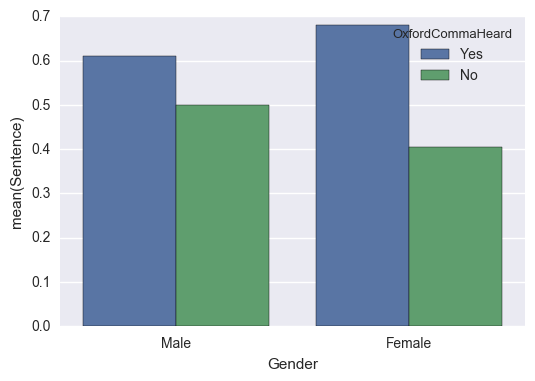

In [61]:
sns.barplot(x="Gender", y="Sentence", hue="OxfordCommaHeard", data=comma, ci = None)

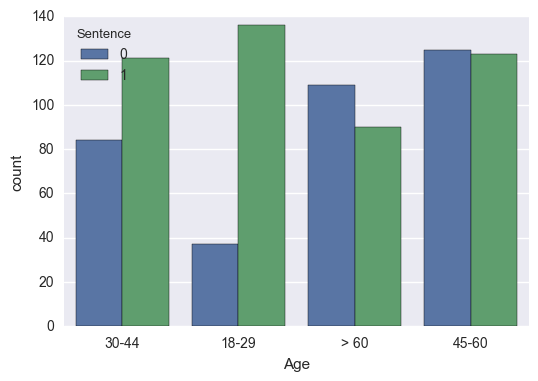

In [59]:
sns.countplot(x="Age", data=comma, hue = 'Sentence');

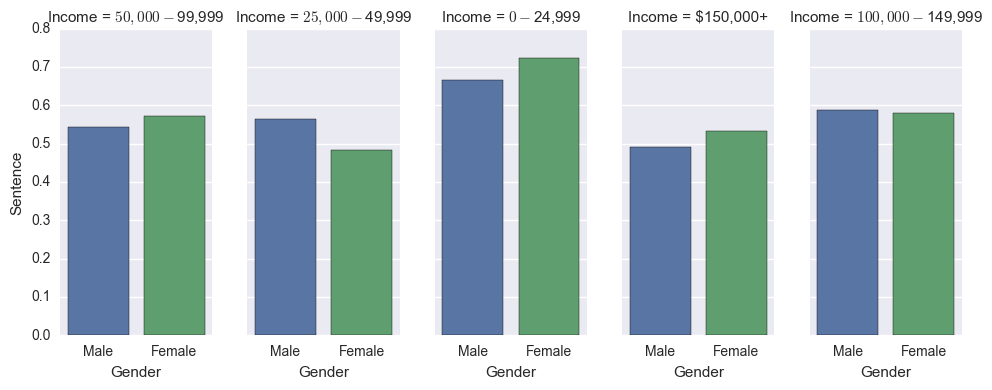

In [82]:
sns.factorplot(x="Gender", y="Sentence", 
               col="Income", data=comma, kind="bar", size=4, aspect=.5, ci=None)